# **This is the first model that will be part of a multi-modal DL model consisting of 3 models**

### This model will process images from the front of the car only (no map, not information about distances)

#### **1. importing necessary libraries**

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from PIL import Image
import time

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True

##### 1.1. we import the data

In [27]:
# Load the data
df = pd.read_csv('../frameRecorder/data.csv')

df.head()

,image_id,q,z,s,d,zq,zd,sq,sd
0,1682028946060,0,0,0,0,0,0,0,0
1,1682028946095,0,0,0,0,0,0,0,0
2,1682028946131,0,0,0,0,0,0,0,0
3,1682028946166,0,1,0,0,0,0,0,0
4,1682028946196,0,1,0,0,0,0,0,0


In [28]:
counts = df.sum()
print(counts)
min_count = counts.min()
print(min_count)
# df_filtered = df.groupby(['q', 'z', 's', 'd', 'zq', 'zd', 'sq', 'sd']).filter(lambda x: (x['q']==1).sum() <= min_count and (x['z']==1).sum() <= min_count and (x['s']==1).sum() <= min_count and (x['d']==1).sum() <= min_count and (x['zq']==1).sum() <= min_count and (x['zd']==1).sum() <= min_count and (x['sq']==1).sum() <= min_count and (x['sd']==1).sum() <= min_count)
# print(df_filtered.sum())
# print(df_filtered.shape)
# df_filtered.head()

image_id    24599687019114602
q                         308
z                        6471
s                         939
d                         296
zq                        365
zd                        419
sq                         40
sd                         53
dtype: int64
40


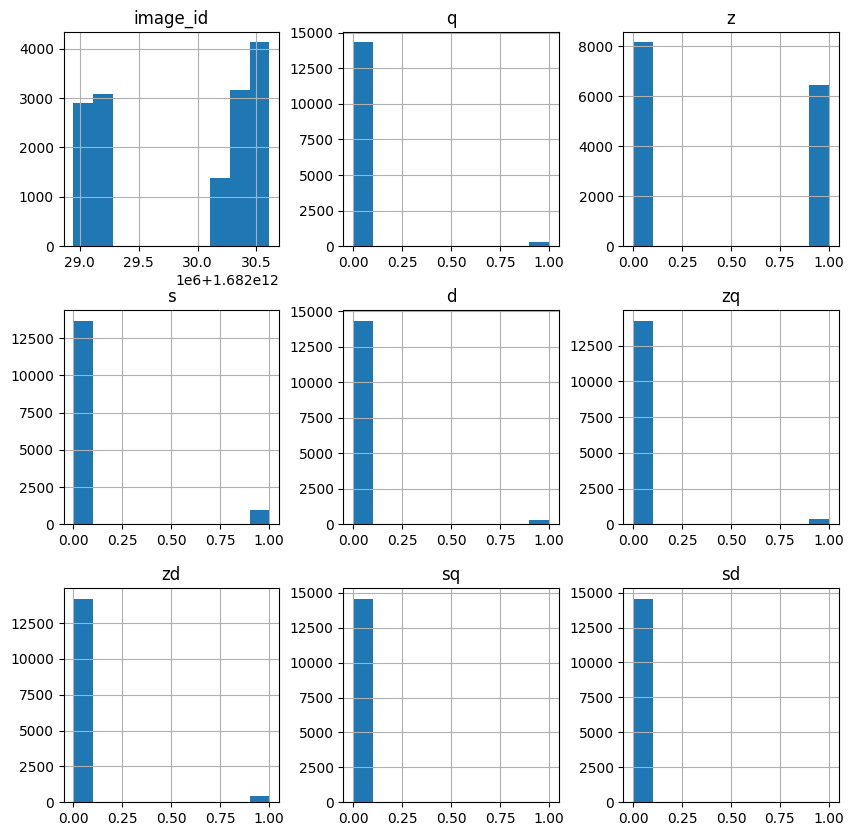

In [59]:
# display a histogram of the data to compare the distribution of 'q', 'z', 's', 'd', 'zq', 'zd', 'sq', 'sd' in the dataset
df.hist(figsize=(10,10))
plt.show()

In [29]:
X, y = df.iloc[:, 0], df.iloc[:, 1:]
print(X[0:10])
print(X.shape)
print(y.shape)

0    1682028946060
1    1682028946095
2    1682028946131
3    1682028946166
4    1682028946196
5    1682028946227
6    1682028946264
7    1682028946301
8    1682028946337
9    1682028946374
Name: image_id, dtype: int64
(14625,)
(14625, 8)


In [30]:
XX = []
for i in X:
    img = cv.imread('../frameRecorder/screenshots/' + str(i) + '.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (200, 150))
    img = img / 255
    XX.append(img)

In [31]:
# split the data into training , validation and testing
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

In [32]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [33]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(5265, 150, 200, 3)
(3510, 150, 200, 3)
(5850, 150, 200, 3)
(5265, 8)


#### 1.2. we create the model 

In [45]:
# create the model using keras
with tf.compat.v1.Session(config=config) as sess:
    model = Sequential([
        Conv2D(24, (5, 5), (2, 2), activation='relu', input_shape=(150, 200, 3)),
        Conv2D(36, (5, 5), (2, 2), activation='relu'),
        Conv2D(48, (5, 5), (2, 2), activation='relu'),
        Conv2D(64, (3, 3), (2, 2), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(8, activation='softmax')
    ])

In [46]:
# compile the model
with tf.compat.v1.Session(config=config) as sess:
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize the model
    model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 73, 98, 24)        1824      
                                                                 
 conv2d_41 (Conv2D)          (None, 35, 47, 36)        21636     
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 22, 48)        43248     
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 10, 64)         27712     
                                                                 
 conv2d_44 (Conv2D)          (None, 5, 8, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 2560)              0         
                                                                 
 dense_28 (Dense)            (None, 100)              

Train on 5265 samples, validate on 3510 samples
Epoch 1/20
5265/5265 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9101
Epoch 1: val_accuracy improved from -inf to 0.90848, saving model to model_2_1_0.h5
5265/5265 [==============================] - 8s 1ms/sample - loss: 0.2086 - accuracy: 0.9101 - val_loss: 0.1848 - val_accuracy: 0.9085
Epoch 2/20
5265/5265 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9102
Epoch 2: val_accuracy did not improve from 0.90848
5265/5265 [==============================] - 7s 1ms/sample - loss: 0.1798 - accuracy: 0.9102 - val_loss: 0.1806 - val_accuracy: 0.9085
Epoch 3/20
5216/5265 [============================>.] - ETA: 0s - loss: 0.1744 - accuracy: 0.9108
Epoch 3: val_accuracy did not improve from 0.90848
5265/5265 [==============================] - 7s 1ms/sample - loss: 0.1744 - accuracy: 0.9108 - val_loss: 0.1715 - val_accuracy: 0.9085
Epoch 4/20
5265/5265 [==============================] - ETA: 0s - l

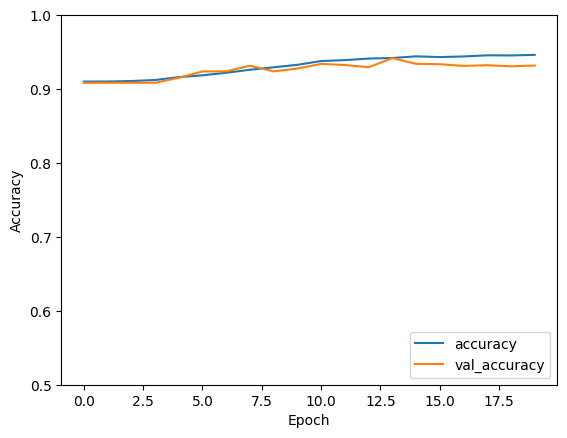

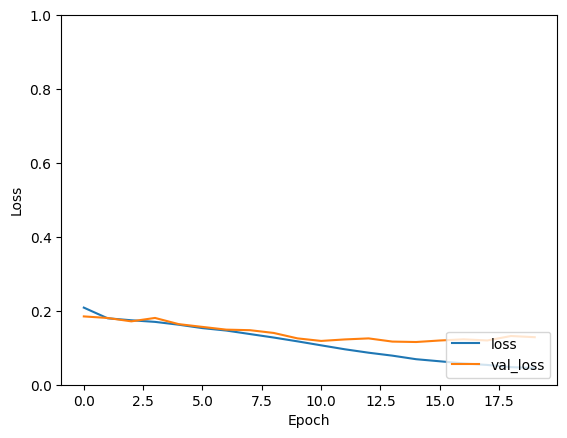

In [47]:
# train the model
with tf.compat.v1.Session(config=config) as sess:
    # define early stopping callback
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_2_1_0.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
        
    # fit the model but using batches of 32 images at a time and 10 epochs 
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint])

    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=2)
    print('Test Accuracy: {}'.format(acc))
    print('Test Loss: {}'.format(loss))

    # plot the accuracy
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

    # plot the loss
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


In [48]:
# load model

model_test = tf.keras.models.load_model('model_2_1_0.h5')

1/1 [==============================] - 0s 21ms/step
(1, 8)
[0.0 0.9700000286102295 0.009999999776482582 0.0 0.019999999552965164 0.009999999776482582 0.0 0.0 ]
Prediction time: 0.057590484619140625


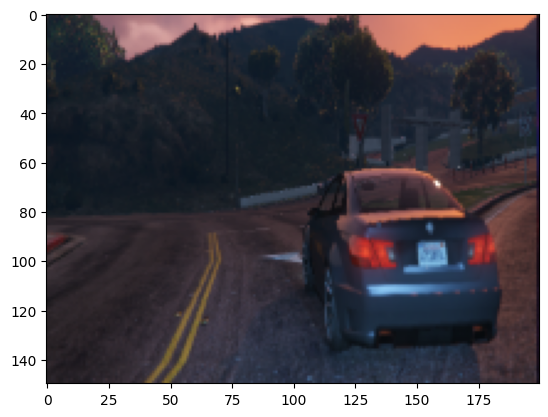

In [58]:
# predict the test data
t1 = time.time()
prediction = model_test.predict(np.array([XX[255]]))
t2 = time.time()
print(prediction.shape)
print('[', end='')
for(i, j) in enumerate(prediction[0]):
    print(f'{round(j, 2)}', end=' ')
print(']')
    
print(f'Prediction time: {t2 - t1}')

# plot the image and the prediction
plt.imshow(XX[255])
plt.show()

# qzsd,zq,zd,sq,sd